<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/COURSE_9_ML_MODULE_2_Reg_Simple_Linear_Regression_Co2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model


### Importing Needed packages


In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install numpy
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Downloading Data
To download the data, we will use !wget to download it from IBM Object Storage.


In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2025-01-07 14:37:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2025-01-07 14:37:48 (2.23 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In case you're working **locally** uncomment the below line.


In [ ]:
#!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration
Let's first have a descriptive exploration on our data.


In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


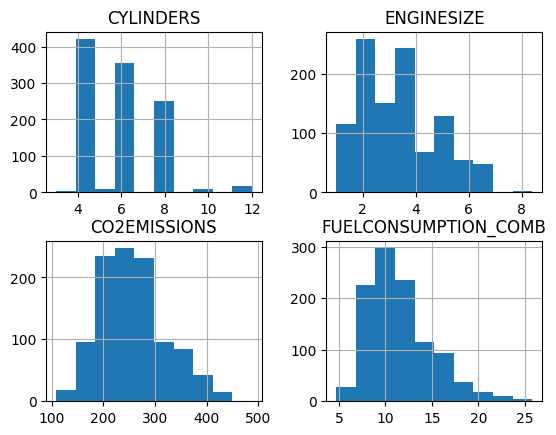

In [6]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


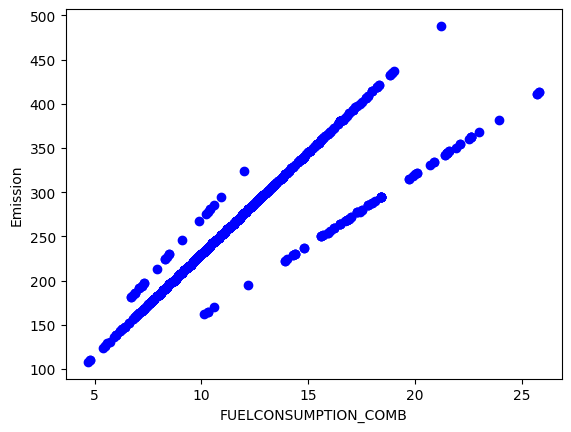

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

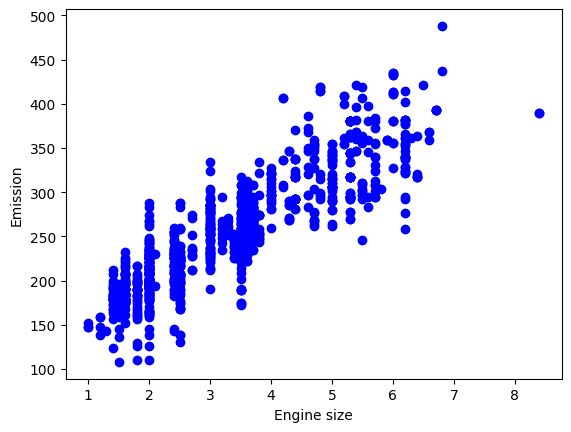

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Practice
Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


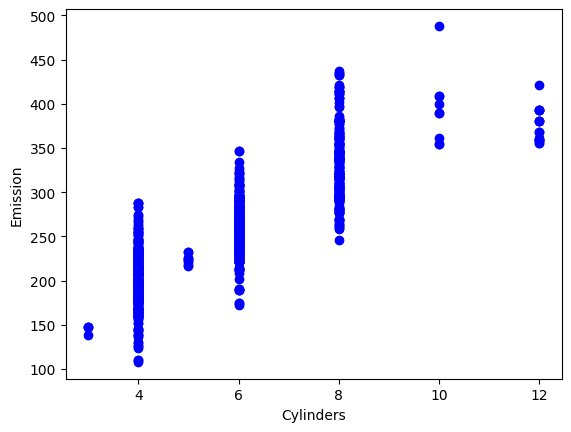

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()


## Using seaborn ```pairplot ```
- We can see in a single figure pairwise relationships between variables in a dataset.

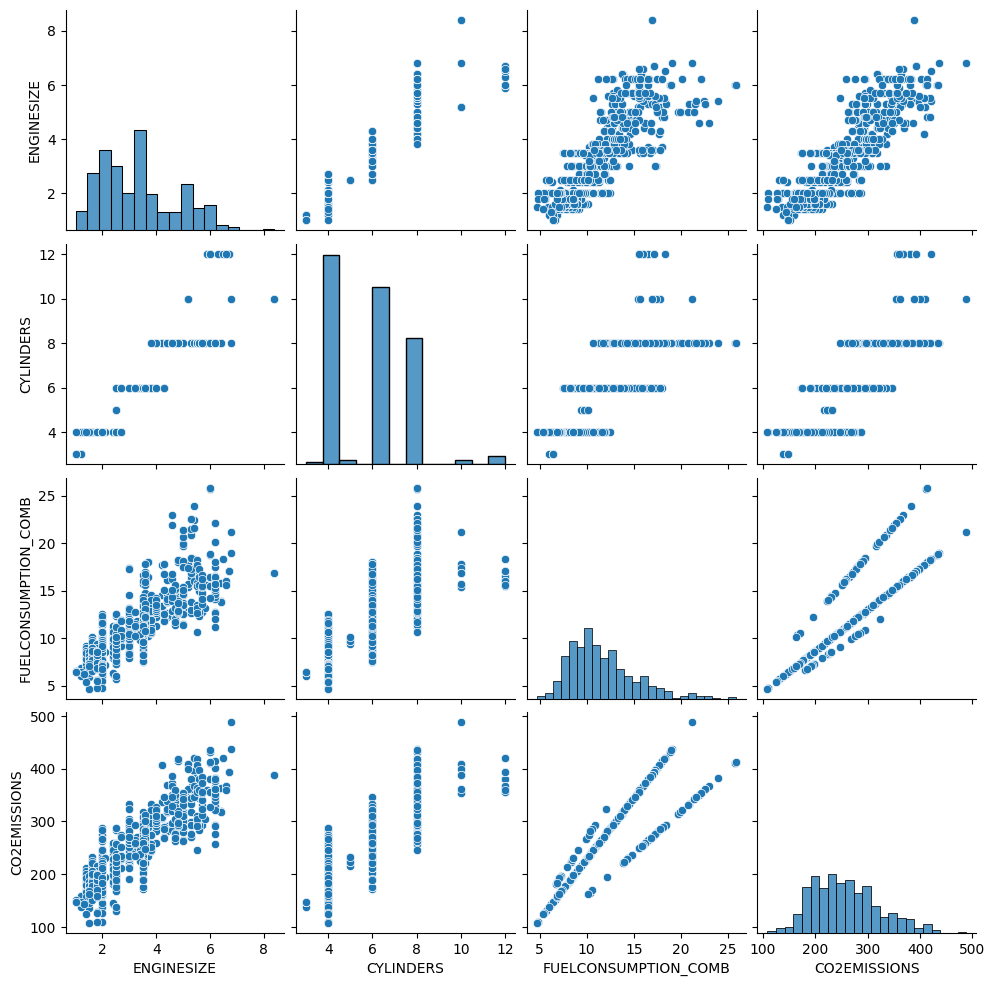

In [10]:
import seaborn as sns
sns.pairplot(cdf)

<details><summary>Click here for the solution</summary>

```python    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

```

</details>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:


In [11]:
# Step 1: Create a mask to split the data
msk = np.random.rand(len(df)) < 0.8
# Explanation:
# - `np.random.rand(len(df))` generates an array of random numbers between 0 and 1.
#   The array length matches the number of rows in the DataFrame `df`.
# - `< 0.8` creates a boolean mask where approximately 80% of the values are `True`
#   (for random values less than 0.8), and the rest are `False`.

# Step 2: Use the mask to split the DataFrame into training and testing sets
train = cdf[msk]
# Explanation:
# - `cdf[msk]` selects only the rows from the DataFrame `cdf` where the mask `msk` is `True`.
# - This creates a training dataset containing approximately 80% of the original data.

test = cdf[~msk]
# Explanation:
# - `~msk` inverts the mask, turning `True` values into `False` and vice versa.
# - `cdf[~msk]` selects rows where the mask `msk` is `False`.
# - This creates a testing dataset containing the remaining approximately 20% of the data.

# Key Points:
# - The `train` and `test` datasets are mutually exclusive because the mask splits the data.
# - The split is random, ensuring that the training and testing sets are representative of the original dataset.
# - The proportion of the split (80%-20%) is determined by the threshold `0.8` in the mask.


In [ ]:
# Let's see in more detail:
np.random.rand(len(df))

array([0.55758814, 0.49904569, 0.34072299, ..., 0.10689847, 0.74311256,
       0.41947887])

In [ ]:
# Let's see in more detail:
np.random.rand(len(df)) < 0.8

array([ True,  True,  True, ...,  True,  True,  True])

In [25]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230


### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


#### Train data distribution


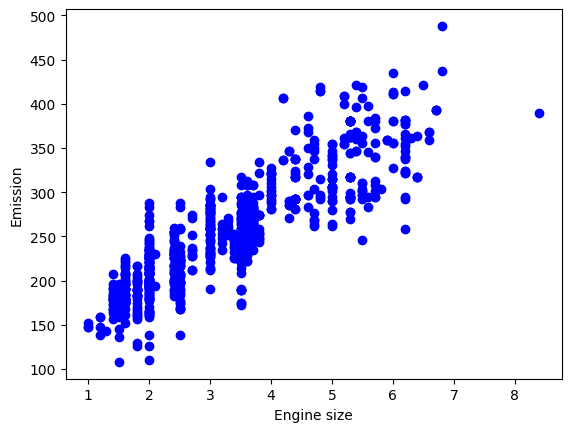

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

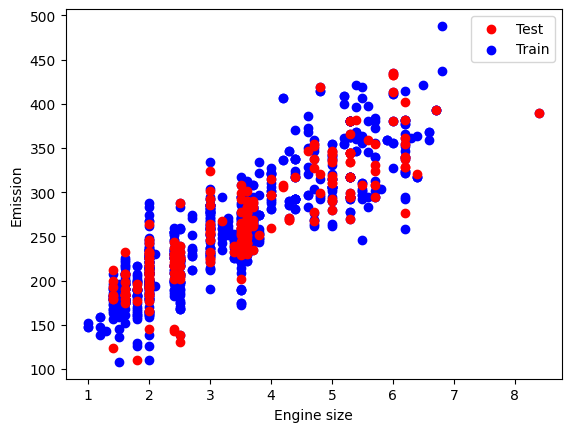

In [20]:
# Also we can see together both, Train and Test data set and the random nature of the split
plt.scatter(test.ENGINESIZE, test.CO2EMISSIONS,  color='red',zorder=10, label='Test')
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue',zorder=0, label='Train')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.legend()
plt.show()

#### Modeling
Using sklearn package to model data.


In [21]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.45856547]]
Intercept:  [124.39670496]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

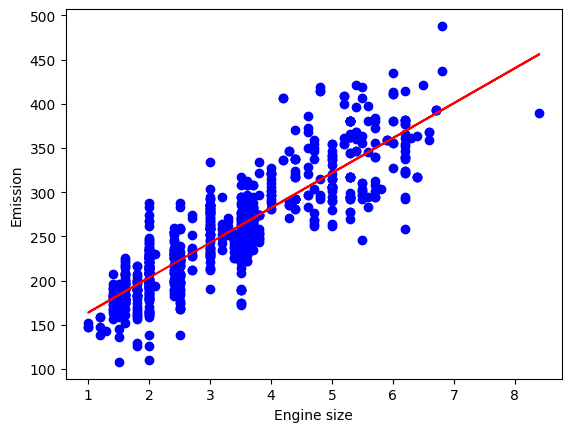

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE).

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [24]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.80
Residual sum of squares (MSE): 930.30
R2-score: 0.77


## Exercise


Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe


In [26]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])


<details><summary>Click here for the solution</summary>

```python    
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

```

</details>


Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously


In [27]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[16.61744771]]
Intercept:  [63.92795527]


<details><summary>Click here for the solution</summary>

```python    
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

```

</details>


Find the predictions using the model's `predict` function and the `test_x` data


In [28]:
#Click here for the solution
predictions = regr.predict(test_x)

<details><summary>Click here for the solution</summary>

```python    
predictions = regr.predict(test_x)

```

</details>


Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously


In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predictions) )


Mean absolute error: 21.37
Residual sum of squares (MSE): 954.91
R2-score: 0.76


<details><summary>Click here for the solution</summary>

```python    
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

```

</details>


We can see that the MAE is much worse when we train using `ENGINESIZE` than `FUELCONSUMPTION_COMB`


### Thank you for completing this lab!


## Author

Saeed Aghabozorgi


### Other Contributors

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

Azim Hirjani

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-11-03 | 2.1  | Lakshmi Holla  |  Changed URL of the csv |
| 2020-08-27  | 2.0  | Lavanya  |  Moved lab to course repo in GitLab |
|   |   |   |   |
|   |   |   |   |

--!>




# USING SCIKIT LEARN TOOLS

# Linear Regression for Predicting CO2 Emissions

This code demonstrates how to use **Linear Regression** to model the relationship between engine size and CO2 emissions in a dataset. Here's a step-by-step explanation:

---

## Step 1: Import Required Libraries

We use:

- **`pandas`** for data manipulation.
- **`sklearn`** for splitting data, creating the regression model, and evaluating performance metrics.
- **`matplotlib`** for data visualization.
- **`numpy`** for mathematical operations (e.g., square root).

---

## Step 2: Load and Prepare Data

- **Independent variable (`x_data`)**: Engine size (requires a 2D DataFrame format for scikit-learn).
- **Dependent variable (`y_data`)**: CO2 emissions.

---

## Step 3: Split Data into Training and Testing Sets

The **`train_test_split`** function divides the dataset into two subsets:
- **Training set** (80% of the data) for training the model.
- **Testing set** (20% of the data) for evaluating the model's performance.

Setting `random_state=1` ensures reproducibility.

---

## Step 4: Train the Linear Regression Model

- We initialize the `LinearRegression` class.
- The `.fit()` method trains the model on the training dataset, estimating:
  - **Slope (coefficient)**: The rate of change in CO2 emissions with engine size.
  - **Intercept**: The predicted CO2 emissions when engine size is zero.

---

## Step 5: Display Model Coefficients

- **Coefficient (`coef_`)**: Represents how much the dependent variable (CO2 emissions) changes per unit increase in the independent variable (engine size).
- **Intercept (`intercept_`)**: The value of CO2 emissions when the engine size is zero.

---

## Step 6: Make Predictions

- Using `.predict()`, the model predicts CO2 emissions for the test dataset based on the learned relationship.

---

## Step 7: Evaluate the Model

Three metrics are calculated to measure the model's performance:

1. **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values.
2. **Root Mean Squared Error (RMSE)**: Measures the spread of errors; penalizes larger errors more than smaller ones.
3. **R-squared (R²)**: Indicates the proportion of variance in CO2 emissions explained by engine size.

---

## Step 8: Visualize the Results

- A **scatter plot** shows the actual data points (blue).
- The **regression line** (red) represents the model's predictions across the dataset.
- **Labels** and a **legend** enhance interpretability.

---

## Output

### Metrics:
- **MAE**, **RMSE**, and **R²** provide insights into the model's accuracy and reliability.

### Visualization:
- The scatter plot and regression line visually depict the relationship between engine size and CO2 emissions.


In [67]:
# let's create our dataframe based on a csv file
# download the dataset in .csv format
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
# create a dataframe
df = pd.read_csv("FuelConsumption.csv")
# inspect the dataframe
df.head()

--2025-01-07 16:00:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2025-01-07 16:00:08 (542 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [68]:
# let's also see some more charactetistics of the dataframe at a glance with describe()
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000



In the next step, we observe from the dataframe description that we have 1067 items, so from the train_test_split we have a test size =0.2 then 0.2*1067 = 214 elements and a train size of 0.8*1067=853 elements.

Number of test samples: 214
Number of training samples: 853
Model coefficients: [39.4153746]
Model intercept: 124.77059523158408

Model Evaluation Metrics:
Mean Absolute Error (MAE): 23.21
Root Mean Squared Error (RMSE): 30.91
R-squared (R²): 0.76


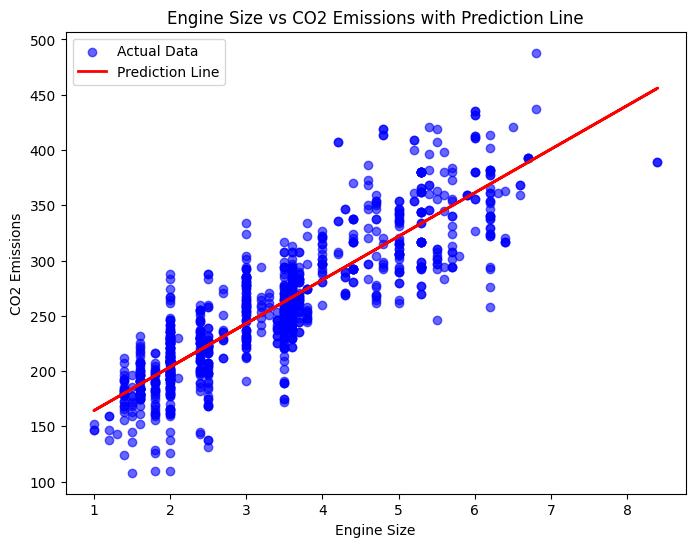

In [69]:
# Linear regression model
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Assuming the dataframe `df` is already loaded  IN THE PREVIOUS STEP
# `df` should contain the columns `ENGINESIZE` and `CO2EMISSIONS` for this example.

# Step 2: Extract the independent and dependent variables
x_data = df[['ENGINESIZE']]  # Engine size as the independent variable (2D DataFrame format is required for sklearn models)
y_data = df['CO2EMISSIONS']  # CO2 emissions as the dependent variable (1D Series)

# Step 3: Split the dataset into training and testing subsets
# `train_test_split` divides the dataset, reserving 20% of the data for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

# Step 4: Print the number of samples in each subset to confirm the split
print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Step 5: Create and train the Linear Regression model
# `LinearRegression` fits a straight line to the data by minimizing the error
lre = LinearRegression()  # Initialize the model
lre.fit(x_train, y_train)  # Train the model on the training dataset

# Step 6: Output the model coefficients and intercept
print("Model coefficients:", lre.coef_)  # The slope of the regression line
print("Model intercept:", lre.intercept_)  # The y-intercept of the regression line

# Step 7: Make predictions on the test dataset
y_pred = lre.predict(x_test)  # Predict CO2 emissions for the test data

# Step 8: Evaluate the model's performance using metrics
mae = mean_absolute_error(y_test, y_pred)  # Average absolute difference between predicted and actual values
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root of the average squared differences
r2 = r2_score(y_test, y_pred)  # Proportion of variance explained by the model (R-squared)

# Step 9: Display the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Step 10: Visualize the data and regression line
plt.figure(figsize=(8, 6))  # Set the figure size

# Scatter plot for actual data
plt.scatter(x_data, y_data, color='blue', label='Actual Data', alpha=0.6)  # Plot data points

# Plot the prediction line based on the trained model
plt.plot(x_data, lre.predict(x_data), color='red', linewidth=2, label='Prediction Line')  # Regression line

# Add labels and a title for the plot
plt.xlabel('Engine Size')  # X-axis label
plt.ylabel('CO2 Emissions')  # Y-axis label
plt.title('Engine Size vs CO2 Emissions with Prediction Line')  # Title

# Add a legend to distinguish between data and prediction line
plt.legend()

# Display the plot
plt.show()



# CODE VARIATION: LET'S ADD A SELECTOR OF THE COLUMNS TO DEFINE X_DATA AND Y_DATA

So here we will do the same as before but including a selector that reads the column names of the dataframe and then the user can define which is gonna be the independent variable x_data and the dependent variable y_data

In [70]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression  # For creating a linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance
import numpy as np  # For numerical operations (e.g., square root)
import matplotlib.pyplot as plt  # For plotting data and regression results
import ipywidgets as widgets  # For creating interactive widgets
from IPython.display import display  # For displaying widgets and outputs in Jupyter

# Load the dataset into a pandas DataFrame
# Replace "FuelConsumption.csv" with the path to your dataset
df = pd.read_csv("FuelConsumption.csv")

# Create dropdown widgets for selecting X-axis (independent variable) and Y-axis (dependent variable) from the dataframe
x_selector = widgets.Dropdown(
    options=df.columns,  # Populate the dropdown with column names from the DataFrame
    description='X-axis:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Adjust label width for better readability
)
y_selector = widgets.Dropdown(
    options=df.columns,  # Populate the dropdown with column names from the DataFrame
    description='Y-axis:',  # Label for the dropdown
    style={'description_width': 'initial'}  # Adjust label width for better readability
)

# Create a button widget to trigger the linear regression process
button = widgets.Button(description="Run Linear Regression")

# Create an output widget to display results such as metrics and plots
output = widgets.Output()

# Define a function that runs when the button is clicked
def on_button_click(b):
    with output:  # Output all prints and plots to the output widget
        output.clear_output()  # Clear previous output to avoid clutter

        # Retrieve the selected columns for X and Y axes
        x_data = df[[x_selector.value]]  # X-axis data (independent variable), ensure it's 2D
        y_data = df[y_selector.value]  # Y-axis data (dependent variable)

        # Split the data into training and testing sets
        # 80% for training and 20% for testing, with a fixed random state for reproducibility
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)

        # Initialize and train a Linear Regression model
        model = LinearRegression()
        model.fit(x_train, y_train)  # Fit the model to the training data

        # Make predictions on the test set
        y_pred = model.predict(x_test)

        # Calculate evaluation metrics for the model
        mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
        r2 = r2_score(y_test, y_pred)  # R-squared, a measure of goodness of fit

        # Display the evaluation metrics
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"R-squared (R²): {r2:.2f}")

        # Plot the results
        plt.figure(figsize=(8, 6))  # Set the plot size
        # Scatter plot of actual data
        plt.scatter(x_data, y_data, color='blue', alpha=0.6, label='Actual Data')
        # Regression line (predictions made by the model across the entire X range)
        plt.plot(x_data, model.predict(df[[x_selector.value]]), color='red', label='Prediction Line')
        # Label the axes and add a title
        plt.xlabel(x_selector.value)
        plt.ylabel(y_selector.value)
        plt.title(f'{x_selector.value} vs {y_selector.value} with Regression Line')
        plt.legend()  # Add a legend for clarity
        plt.show()  # Display the plot

# Link the button click event to the `on_button_click` function
button.on_click(on_button_click)

# Display the interactive widgets and output in a vertical box layout
display(widgets.VBox([x_selector, y_selector, button, output]))

